### AUTHOR: VAISHNAV KRISHNA P
#### INTERNSHIP: BHARAT INTERN 
#### TOPIC : ADVANCE HOUSE PRICE PREDICTION
#### DATASET IS TAKEN FROM: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
#### Goal:
* It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

#### metrics:
* Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [485]:
# importing necessory libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

# ignoring the warnings 
import warnings 
warnings.filterwarnings(action="ignore")

# setting print options 
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# importing modules for skewness and kurtosis 
from scipy.stats import skew,kurtosis

# for train test spllit
from sklearn.model_selection import train_test_split,cross_val_score,KFold


# modules for label encoding 
from sklearn.preprocessing import LabelEncoder

# importing some regression model for prediction
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# metrics for evaluation
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [486]:
# Loading the dataset
df = pd.read_csv("train-advreg.csv")
data = df.copy()

In [487]:
# First five recods 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### DATA PREPROCESSING
1. Handling Missing Value
2. Removing the sparse features 
3. Data Tranformation

### HANDLING MISSING VALUES 

In [488]:
# Features with missing values 
features_with_missing = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

In [489]:
# Sparese features removing
sparse_features = []

for feature in df.columns:
    if (df[feature].isnull().sum()/len(df))* 100 >= 80:
        sparse_features.append(feature)
        features_with_missing.remove(feature)

In [490]:
# Categorising the features with missing in to categorical and continous 
categorical_features_with_missing = []
continous_features_with_missing = []

for feature in features_with_missing:
    if df[feature].nunique() <= 30:
        categorical_features_with_missing.append(feature)
    else:
        continous_features_with_missing.append(feature)

In [491]:
# After removing the sparse features
print("Features with Missing : ",features_with_missing)
print("\nSparse features: ",sparse_features)
print("\ncategorical feature with missing: ",categorical_features_with_missing)
print("\nContinous_features with missing: ",continous_features_with_missing)

Features with Missing :  ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

Sparse features:  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

categorical feature with missing:  ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

Continous_features with missing:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


* Since the distribution is not symetrical.will deal the continous data with median.Will deal the missing value of categorical features with most frequent category 

In [492]:
# Handling the continous features 
for feature in continous_features_with_missing:
    df[feature].fillna(df[feature].median(),inplace=True)

In [493]:
# Handling categorical features 
for feature in categorical_features_with_missing:
    df[feature].fillna(df[feature].value_counts().index[0],inplace=True)

In [494]:
# checking whether the feature are handled or not 
df[features_with_missing].isnull().sum()

LotFrontage     0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

### REMOVING THE SPARSE FEATURES 

In [495]:
# Removing the sparse features 
df.drop(columns=sparse_features, inplace=True)

* Now ready to go all features are handled

### DATA TRANSFORMATION

In [496]:
# encoding the categroical features 
encoder = LabelEncoder()

for feature in df.columns:
    if df[feature].dtypes == "O":
        df[feature] = encoder.fit_transform(df[feature])
        df[feature] = df[feature].astype("int")

In [497]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000


In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### DATA REDUCTION

In [499]:
feature_to_remove = []

for feature,cor in zip(df.corr()["SalePrice"].index,df.corr()["SalePrice"]):
    if cor <= 0.1:
        feature_to_remove.append(feature)

In [500]:
print("Feature with very less corelation: ",feature_to_remove)
print("NO of features with less corelation: ",len(feature_to_remove))

Feature with very less corelation:  ['Id', 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'OverallCond', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'HeatingQC', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType']
NO of features with less corelation:  38


In [501]:
# Removing feature with less corelation with the target feature and constant feature 
df.drop(columns=feature_to_remove,inplace=True)

In [502]:
df.shape

(1460, 39)

### REDUCING THE SKEWNESS AND KERTOSIS BY APPLYING LOG TRANSFORMATION

In [503]:
continous_features = []

print("SKEWNESS AND KURTOSIS VALUES \n\n")
for feature in df.columns:
    if df[feature].nunique() > 30:
        continous_features.append(feature)
        print("{}: SKEWNESS - {} KURTOSIS - {}".format(feature,skew(df[feature]),kurtosis(df[feature])))

SKEWNESS AND KURTOSIS VALUES 


LotFrontage: SKEWNESS - 2.4066708091473084 KURTOSIS - 21.83387498211393
LotArea: SKEWNESS - 12.195142125084478 KURTOSIS - 202.5437927513529
YearBuilt: SKEWNESS - -0.612830724202899 KURTOSIS - -0.44215484565294716
YearRemodAdd: SKEWNESS - -0.5030444967597948 KURTOSIS - -1.2719991404772555
MasVnrArea: SKEWNESS - 2.6748646898037354 KURTOSIS - 10.102611811101848
BsmtFinSF1: SKEWNESS - 1.6837708962341815 KURTOSIS - 11.076089857631942
BsmtUnfSF: SKEWNESS - 0.9193227015582005 KURTOSIS - 0.4692620789683075
TotalBsmtSF: SKEWNESS - 1.522688086978629 KURTOSIS - 13.201041630635025
1stFlrSF: SKEWNESS - 1.3753417421837937 KURTOSIS - 5.722076026587489
2ndFlrSF: SKEWNESS - 0.8121942731961613 KURTOSIS - -0.5556767272864769
GrLivArea: SKEWNESS - 1.365155954773434 KURTOSIS - 4.874265760253215
GarageYrBlt: SKEWNESS - -0.6776358326947384 KURTOSIS - -0.2615136910084437
GarageArea: SKEWNESS - 0.1797959420587727 KURTOSIS - 0.9098227950882034
WoodDeckSF: SKEWNESS - 1.53979169980

In [504]:
epsilon = 1e-10

for feature in continous_features:
    if feature != "SalePrice":
        df[feature] = df[feature] + epsilon
        df[feature] = np.log(df[feature])

In [505]:
df.head()

,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleCondition,SalePrice
0,4.174387,9.041922,5,5,7,7.602401,7.602401,1,1,12,13,5.278115,4,2,6.559615,5.010635,6.752270,1,4,6.752270,6.749931,7.444249,1,2,1,3,8,6,0,7.602401,2,6.306275,4,2,-23.025851,4.110874,-23.025851,4,208500
1,4.382027,9.169518,24,2,6,7.588830,7.588830,1,1,8,8,-23.025851,4,1,6.885510,5.648974,7.140453,1,4,7.140453,-23.025851,7.140453,0,2,0,3,6,6,1,7.588830,2,6.131226,4,2,5.697093,-23.025851,-23.025851,4,181500
2,4.219508,9.328123,5,5,7,7.601402,7.601902,1,1,12,13,5.087596,4,2,6.186209,6.073045,6.824374,1,4,6.824374,6.763885,7.487734,1,2,1,3,6,6,1,7.601402,2,6.410175,4,2,-23.025851,3.737670,-23.025851,4,223500
3,4.094345,9.164296,6,5,7,7.557473,7.585789,1,1,13,15,-23.025851,4,0,5.375278,6.291569,6.628041,1,4,6.867974,6.628041,7.448334,1,1,0,3,7,6,1,7.599902,3,6.464588,4,2,-23.025851,3.555348,-23.025851,0,140000
4,4.430817,9.565214,15,5,8,7.600902,7.600902,1,1,12,13,5.857933,4,2,6.484635,6.194405,7.043160,1,4,7.043160,6.959399,7.695303,1,2,1,4,9,6,1,7.600902,3,6.728629,4,2,5.257495,4.430817,-23.025851,4,250000


In [506]:
continous_features = []

print("SKEWNESS AND KURTOSIS VALUES \n\n")
for feature in df.columns:
    if df[feature].nunique() > 30:
        continous_features.append(feature)
        print("{}: SKEWNESS - {} KURTOSIS - {}".format(feature,skew(df[feature]),kurtosis(df[feature])))

SKEWNESS AND KURTOSIS VALUES 


LotFrontage: SKEWNESS - -0.908180512634896 KURTOSIS - 3.540054216391825
LotArea: SKEWNESS - -0.1378519937546044 KURTOSIS - 4.693125425395567
YearBuilt: SKEWNESS - -0.6404847628110042 KURTOSIS - -0.38068814981872245
YearRemodAdd: SKEWNESS - -0.5104839303261735 KURTOSIS - -1.2631442021794888
MasVnrArea: SKEWNESS - 0.39271760813664913 KURTOSIS - -1.8395510603618557
BsmtFinSF1: SKEWNESS - -0.7634159942281503 KURTOSIS - -1.40534237431991
BsmtUnfSF: SKEWNESS - -3.0220178034303835 KURTOSIS - 7.258252910141774
TotalBsmtSF: SKEWNESS - -5.986056787673255 KURTOSIS - 34.05982679179073
1stFlrSF: SKEWNESS - 0.07907560338332877 KURTOSIS - 0.14618526813592503
2ndFlrSF: SKEWNESS - 0.27456893775349633 KURTOSIS - -1.9235412419022377
GrLivArea: SKEWNESS - -0.006987993304577543 KURTOSIS - 0.2775290224845608
GarageYrBlt: SKEWNESS - -0.7012296644217472 KURTOSIS - -0.2073785776845809
GarageArea: SKEWNESS - -3.864015390391666 KURTOSIS - 12.987508214634724
WoodDeckSF: SKEWNESS - 

* So,after transformation skewness and kurtosis has reduced.

### REMOVING THE MULTICOLINEAR FEATURES

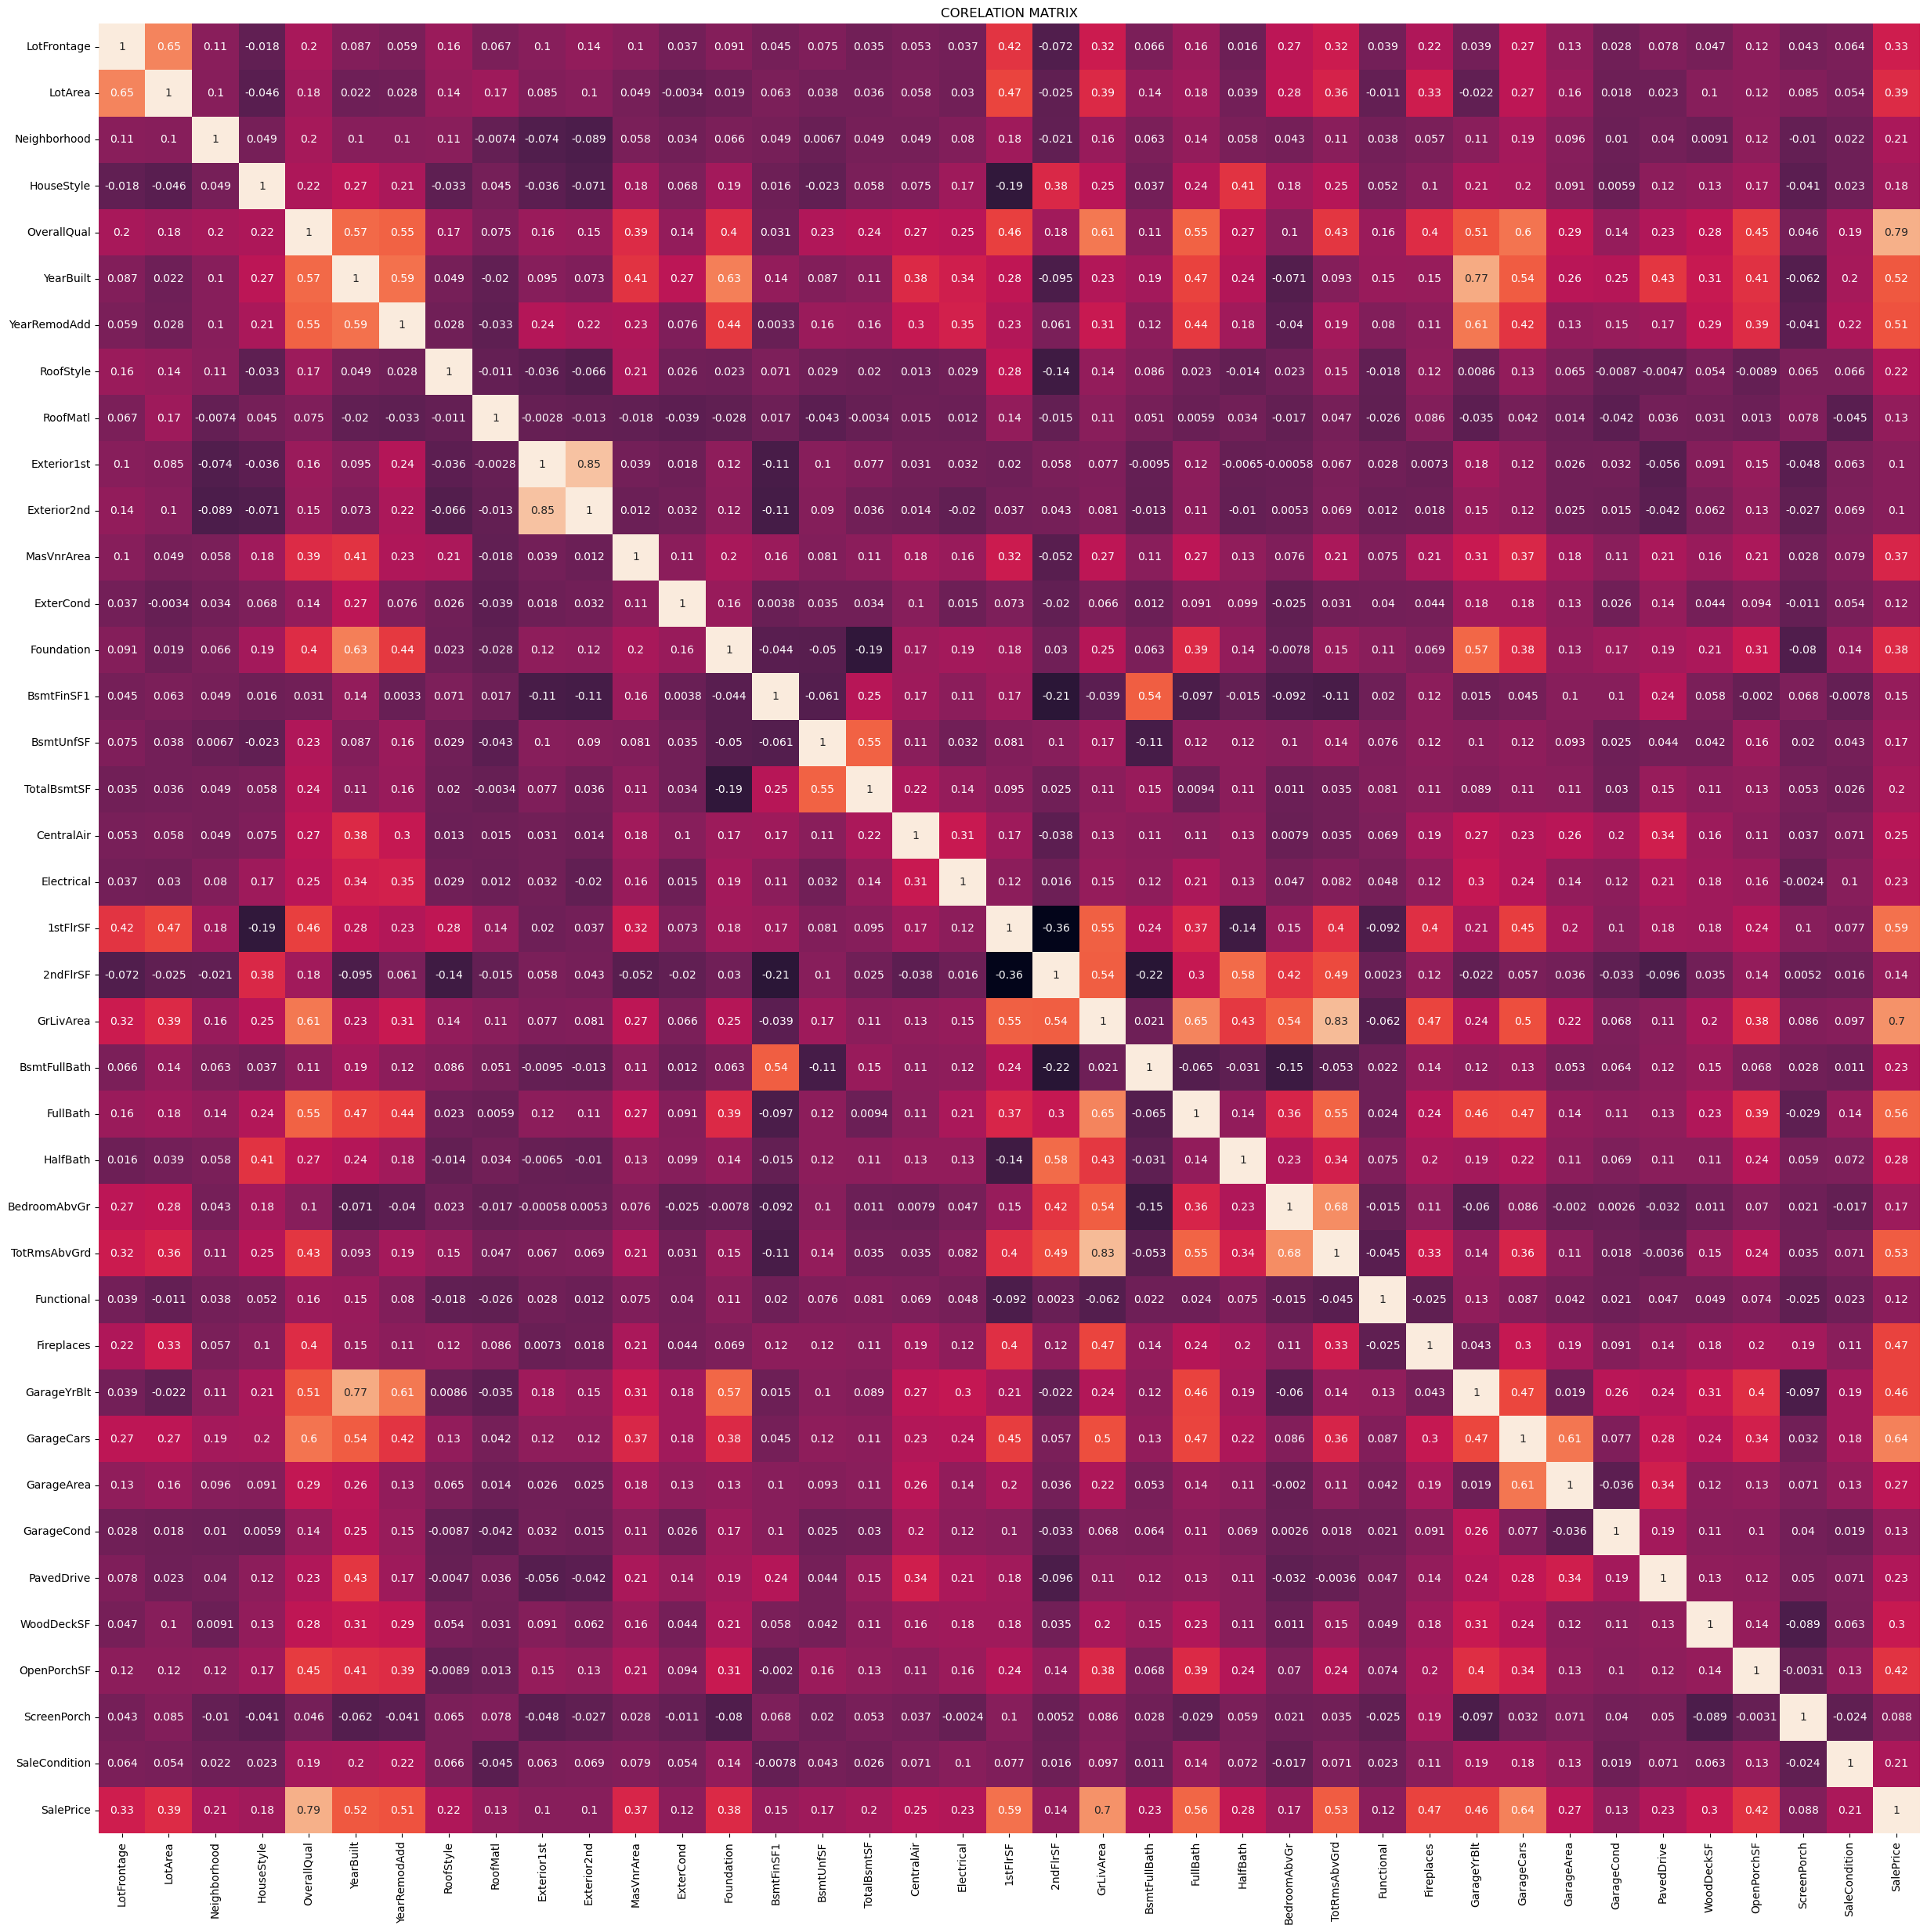

In [507]:
plt.figure(figsize=(30,30))
plt.title("CORELATION MATRIX")
sns.heatmap(df.corr(),annot=True,cbar=False)
plt.show()

* GarageYrBlt and YearRemAdd is colinear with YearofBlt 
* TotRmsAbvGrd is multicolinear with GrdLivAres
* Exterior 1 and Exterior 2 is multicolinear feature 
* LotFrontage and LotArea is highly multicolinear

In [508]:
multicolinear_features_to_remove = ["GarageYrBlt","YearRemodAdd","TotRmsAbvGrd","Exterior2nd","LotFrontage"]

#df.drop(columns=multicolinear_features_to_remove, inplace=True)

### SPLITTING THE DATASET 

In [509]:
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

In [510]:
test_size = 0.2
seed = 42

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size,shuffle=True,random_state=seed)

In [511]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1168, 38), (292, 38), (1168,), (292,))

### SPOT CHECKING 

In [512]:
model_list = ["LR","DT","RF","KNN"]
r2_score_list = []

# Training using Linear regression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = r2_score(y_pred,y_test) 
r2_score_list.append(score)

model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = r2_score(y_pred,y_test) 
r2_score_list.append(score)

model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = r2_score(y_pred,y_test) 
r2_score_list.append(score)

model = KNeighborsRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
score = r2_score(y_pred,y_test) 
r2_score_list.append(score)

In [513]:
r2_score_list

[0.7103528331636164,
 0.75150822816879,
 0.8493337093714695,
 -0.19868457929452488]

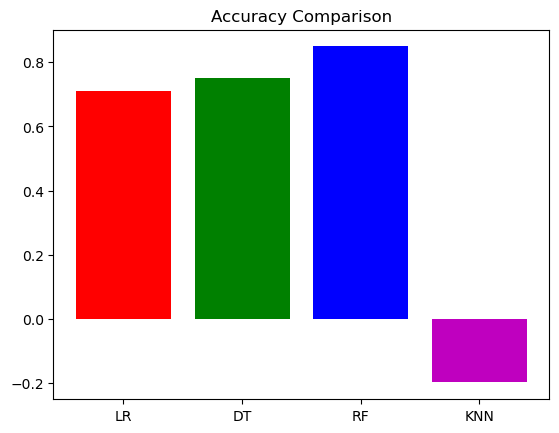

In [514]:
plt.title("Accuracy Comparison")
plt.bar(model_list, r2_score_list,color=["r","g","b","m"])
plt.show()

* Comparitively Random Forest Regressor give more accuracy then the other models.

### TRAINING OF THE MODEL

In [515]:
# Training of the model using Random Forst Regressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

### EVALUATION OF THE MODEL

In [516]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_pred,y_test)
r2_score_value = r2_score(y_pred,y_test)

In [517]:
print("ROOT MEAN SQUARED ERROR:",rmse)
print("MEAN ABSOLUTE ERROR: ",mae)
print("R2 SCORE: ",r2_score_value)

ROOT MEAN SQUARED ERROR: 27690.408937486754
MEAN ABSOLUTE ERROR:  17638.454566210043
R2 SCORE:  0.8645344478978143


* Range of the dataset label is from 34k to 730k.so, range is about 7lacks and the accuracy is impressive

In [518]:
X_test.head()

,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterCond,Foundation,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,SaleCondition
892,4.248495,9.037652,19,2,6,7.582229,7.602401,3,1,6,6,-23.025851,4,1,6.496775,5.981414,6.965080,1,4,6.973543,-23.025851,6.973543,0,1,0,3,6,6,0,7.582229,1,5.575949,4,2,5.257495,-23.025851,-23.025851,4
1105,4.584967,9.413771,15,5,8,7.597898,7.598399,1,1,6,6,5.891644,4,2,6.939254,6.066108,7.288244,1,4,7.313220,7.022868,7.871693,1,2,1,3,9,6,2,7.597898,2,6.568078,4,2,5.225747,3.465736,-23.025851,4
413,4.025352,9.100526,17,2,5,7.563720,7.575585,1,1,14,15,-23.025851,4,1,-23.025851,6.915723,6.915723,1,0,6.935370,-23.025851,6.935370,0,1,0,2,5,6,1,7.563720,2,5.886104,4,2,-23.025851,-23.025851,-23.025851,4
522,3.912023,8.517193,3,0,6,7.574045,7.575585,1,1,5,5,-23.025851,2,1,5.988961,6.405228,6.911747,1,4,6.911747,6.492240,7.416980,0,2,0,3,7,6,2,7.575585,2,6.040255,4,2,-23.025851,3.178054,-23.025851,4
1036,4.488636,9.464828,23,2,9,7.604396,7.604894,3,1,12,13,4.248495,4,2,6.929517,6.393591,7.390181,1,4,7.390181,-23.025851,7.390181,1,2,0,2,6,6,1,7.604894,3,6.815640,4,2,5.429346,-23.025851,-23.025851,4


In [519]:
y_test[:5]

892     154500
1105    325000
413     115000
522     159000
1036    315500
Name: SalePrice, dtype: int64

In [520]:
y_pred[:5]

array([140520.29, 321196.94, 117908.5 , 163608.8 , 310887.84])

* So,our model is working well 